## AIE21069
## LOKESH KOLLEPARA

## 1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot theamplitude part of the spectral components and observe it.

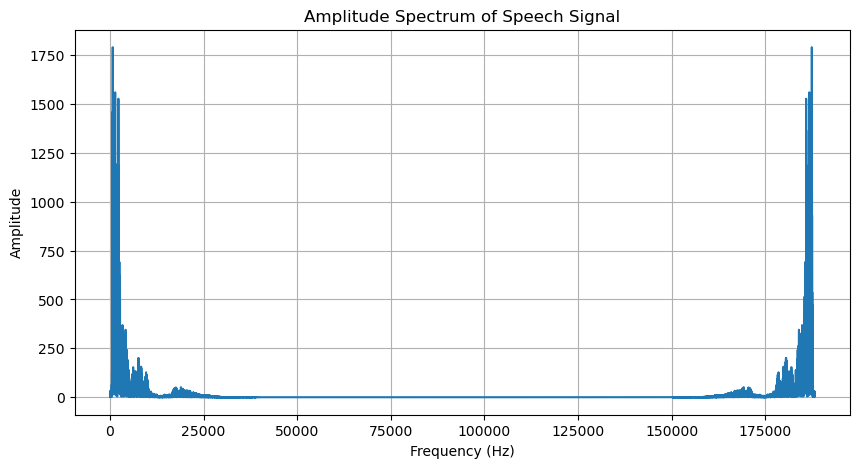

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_file = 'q41.wav'  
signal, sr = librosa.load(audio_file, sr=None)

spectral_domain = np.fft.fft(signal)

magnitude_spectrum = np.abs(spectral_domain)

plt.figure(figsize=(10, 5))
plt.plot(magnitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## 2.Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signalfrom frequency domain to time domain. Compare the generated time domain signal with theoriginal signal.

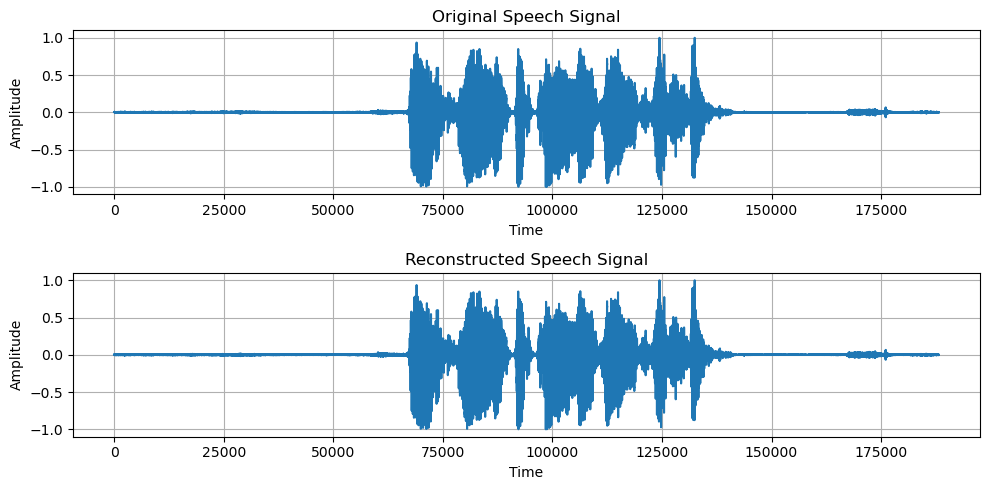

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_file = 'q41.wav'  
signal, sr = librosa.load(audio_file, sr=None)

spectral_domain = np.fft.fft(signal)

reconstructed_signal = np.fft.ifft(spectral_domain)

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal.real)  
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


## A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrumwith the spectrum of the full signal.

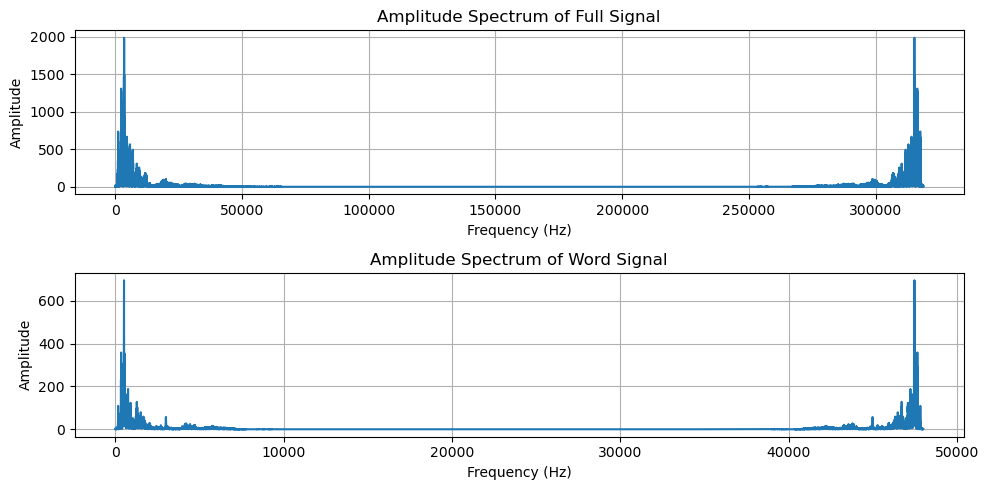

In [14]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_file = 'Lokesh.wav'
signal, sr = librosa.load(audio_file, sr=None)

start_time = 1.0 
end_time = 2.0
word_signal = signal[int(start_time * sr):int(end_time * sr)]

full_spectral_domain = np.fft.fft(signal)

word_spectral_domain = np.fft.fft(word_signal)

full_magnitude_spectrum = np.abs(full_spectral_domain)
word_magnitude_spectrum = np.abs(word_spectral_domain)

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(full_magnitude_spectrum)
plt.title('Amplitude Spectrum of Full Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(word_magnitude_spectrum)
plt.title('Amplitude Spectrum of Word Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


## 4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

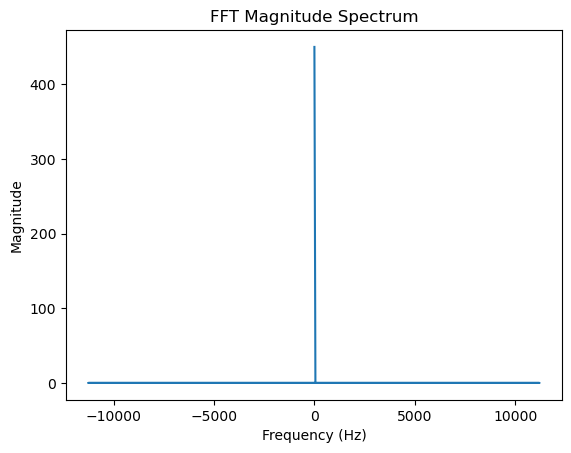

In [15]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 22500  
duration = 0.02 
num_samples = int(sampling_rate * duration)

rectangular_window = np.ones(num_samples)

fft_result = np.fft.fft(rectangular_window)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(num_samples, d=1/sampling_rate)

plt.plot(fft_frequency, fft_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

## A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequencycomponents using numpy.fft.rfft(). Stack these frequency components as columns in amatrix. Use heatmap plot to display the matrix. You may use librosa.stft() orscipy.signal.stft() as well to achieve this.

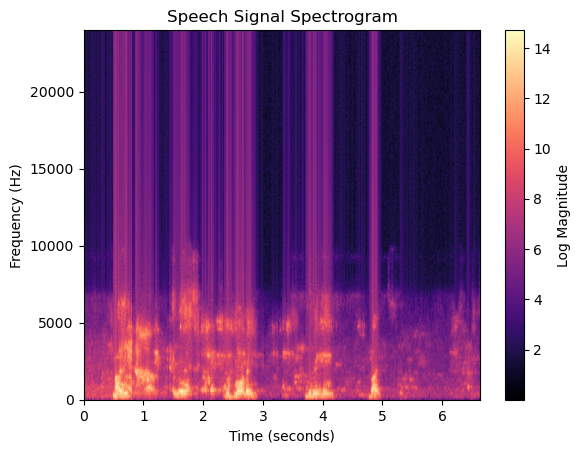

In [17]:
import scipy.io.wavfile as wav
sampling_rate = 22500  # in Hz
duration = 5    
window_size = int(sampling_rate * 0.02)  # 20 ms
sampling_rate, signal = wav.read('Lokesh.wav')
frequency_components = []
for i in range(0, len(signal) - window_size, window_size // 2):
    window = signal[i:i + window_size]
    window = window * np.hamming(window_size)
    spectrum = np.fft.rfft(window)
    
    frequency_components.append(np.abs(spectrum))

frequency_components = np.vstack(frequency_components)
plt.imshow(np.log1p(frequency_components.T), aspect='auto', cmap='magma', origin='lower', extent=[0, len(signal)/sampling_rate, 0, sampling_rate/2])
plt.colorbar(label='Log Magnitude')
plt.title('Speech Signal Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

## A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at thesame duration. Compare the plots.

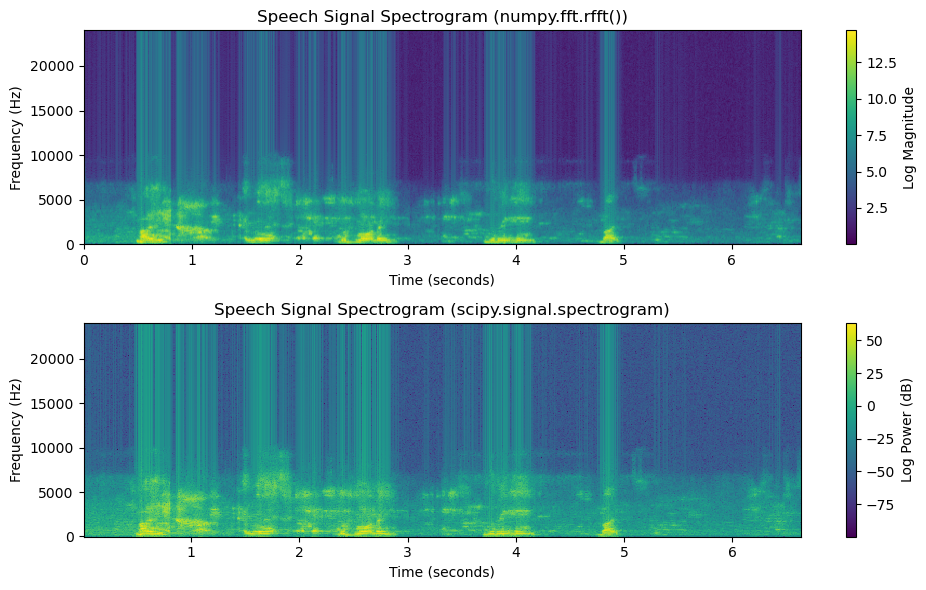

In [18]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

sampling_rate, signal = wav.read('Lokesh.wav')

window_length = 0.02

window_size = int(window_length * sampling_rate)

frequencies, times, Sxx = spectrogram(signal, fs=sampling_rate, window='hamming', nperseg=window_size, noverlap=window_size//2, nfft=window_size)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.imshow(np.log1p(frequency_components.T), aspect='auto', cmap='viridis', origin='lower', extent=[0, len(signal)/sampling_rate, 0, sampling_rate/2])
plt.colorbar(label='Log Magnitude')
plt.title('Speech Signal Spectrogram (numpy.fft.rfft())')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')
plt.colorbar(label='Log Power (dB)')
plt.title('Speech Signal Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()